# Procesos Estocásticos: Hoja 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm
from IPython.display import HTML
from stochastic_processes import plot_time_simulations


## Ejercicio 1

![images/PE-HW2-1.jpg](images/PE-HW2-1.jpg)


## Ejercicio 2

![images/PE-HW2-2.jpg](images/PE-HW2-2.jpg)


b) Illustrate this property by simulating a Wiener process in $[0, 1]$ and making a plot of the sample estimate and the theoretical values of $γ(t, 0.25)$ as a function of $t ∈ [0, 1]$.


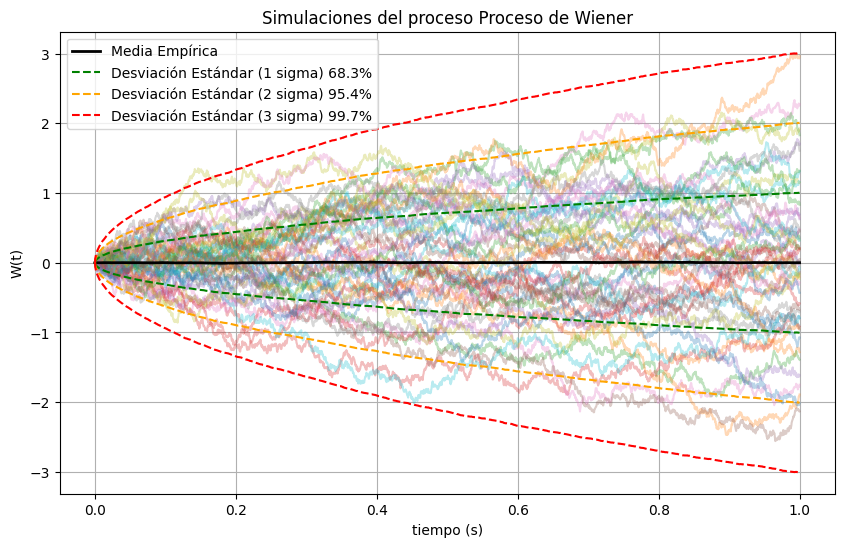

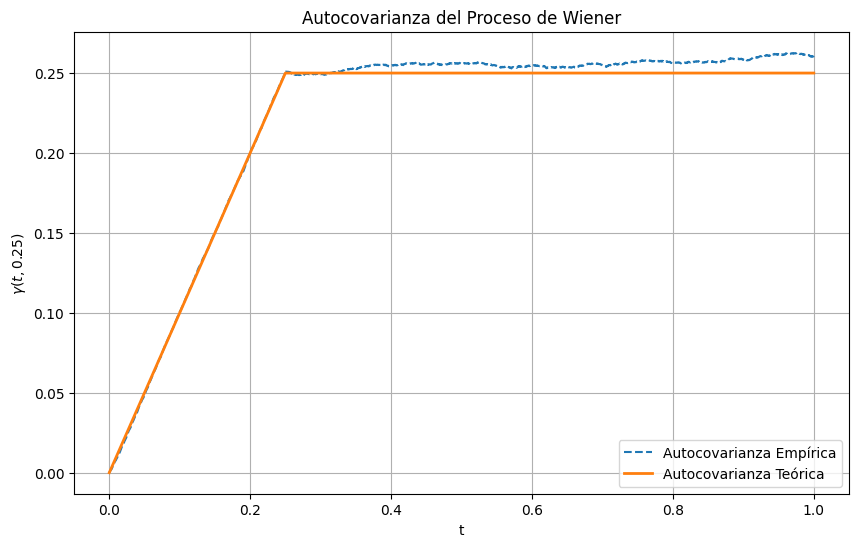

In [2]:
from stochastic_processes import simulate_wiener_process, estimate_autocovariance

# Parámetros
T = 1.0   # Intervalo [0, 1]
W0 = 0.0  # Valor inicial del Wiener
M = 5000  # Número de simulaciones
N = 2500  # Número de pasos
fixed_s = 0.25  # Valor fijo para calcular γ(t, 0.25)
t_values = np.linspace(0, T, N + 1)

# Simulación
W = simulate_wiener_process(T, W0, M, N)

# Media y varianza
mean_empirical = np.mean(W, axis=0)
variance_empirical = np.var(W, axis=0)

# Estimación de la autocovarianza
gamma_empirical = estimate_autocovariance(W, t_values, fixed_s)
gamma_theoretical = np.minimum(t_values, fixed_s)

# Gráfica del proceso de Wiener
plot_time_simulations(W, t_values, "Proceso de Wiener")


# Gráfica de la autocovarianza
plt.figure(figsize=(10, 6))
plt.plot(t_values, gamma_empirical,
         label="Autocovarianza Empírica", linestyle="--")
plt.plot(t_values, gamma_theoretical,
         label="Autocovarianza Teórica", linewidth=2)
plt.xlabel("t")
plt.ylabel(r"$\gamma(t, 0.25)$")
plt.title("Autocovarianza del Proceso de Wiener")
plt.legend()
plt.grid()
plt.show()

## Ejercicio 3

![images/PE-HW2-3.jpg](images/PE-HW2-3.jpg)


Make a plot of the trajectories of the first three processes to illustrate that they are standard Brownian motion processes. Compare the histogram of the final values of the simulated trajectories with the theoretical density function.


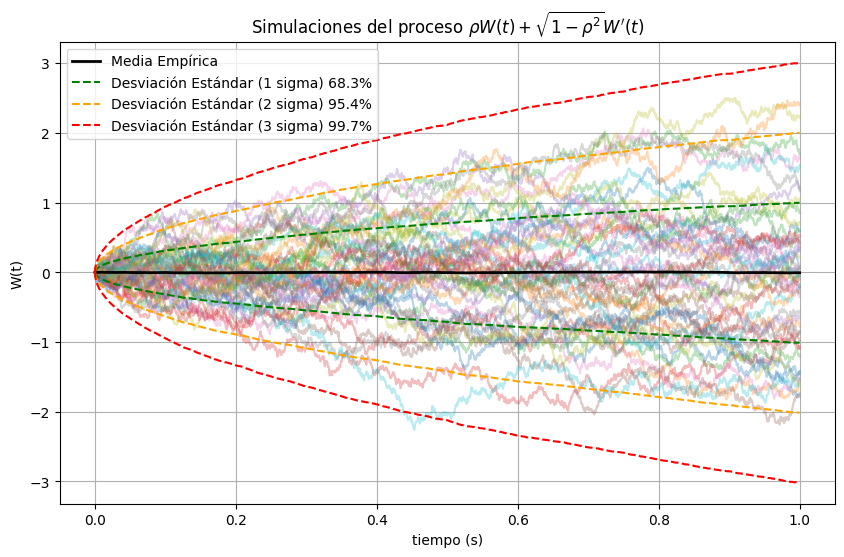

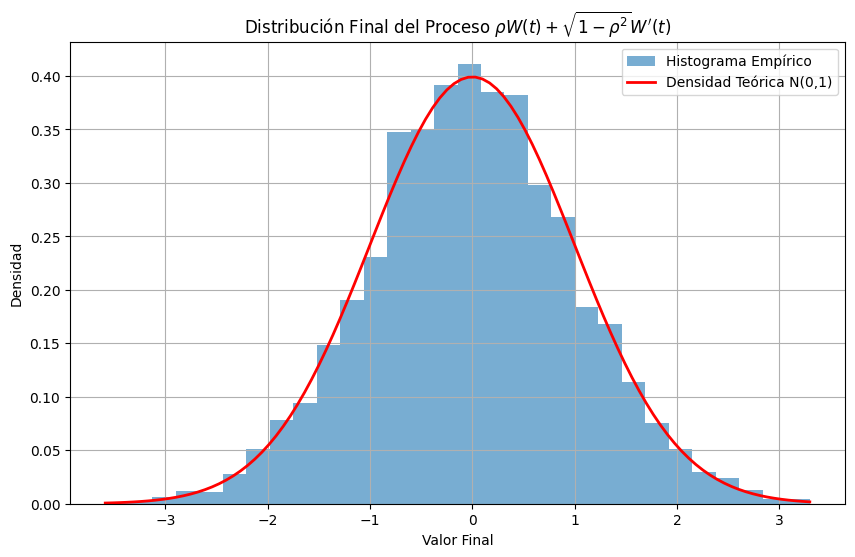

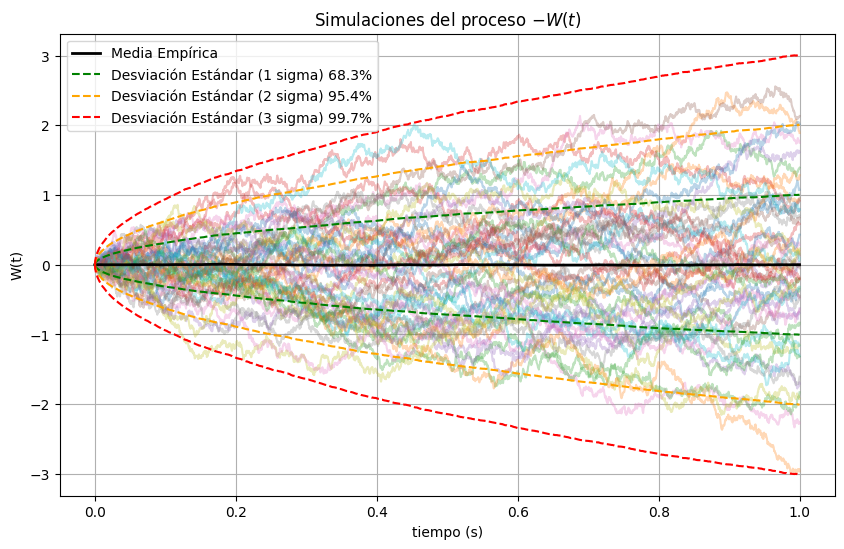

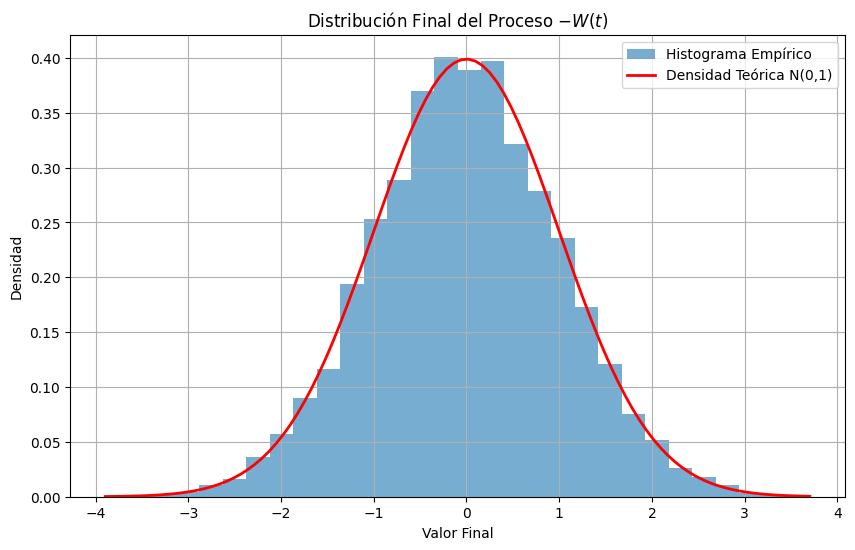

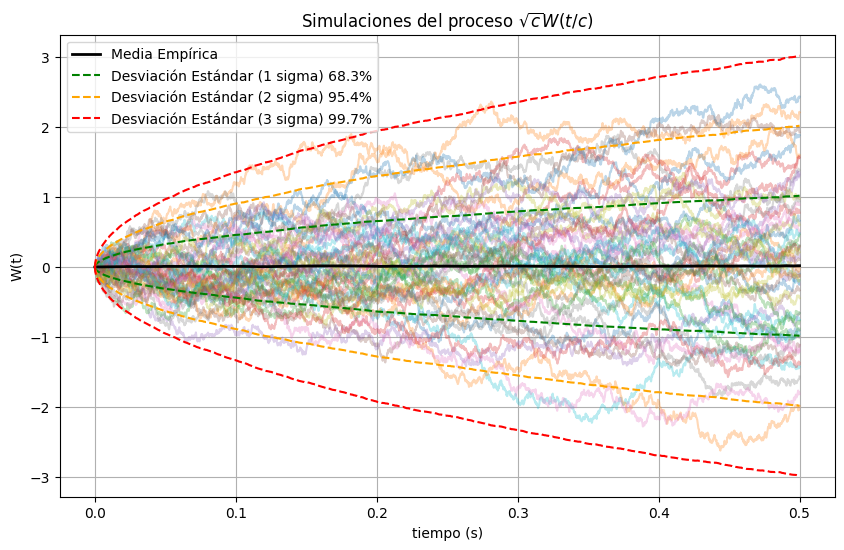

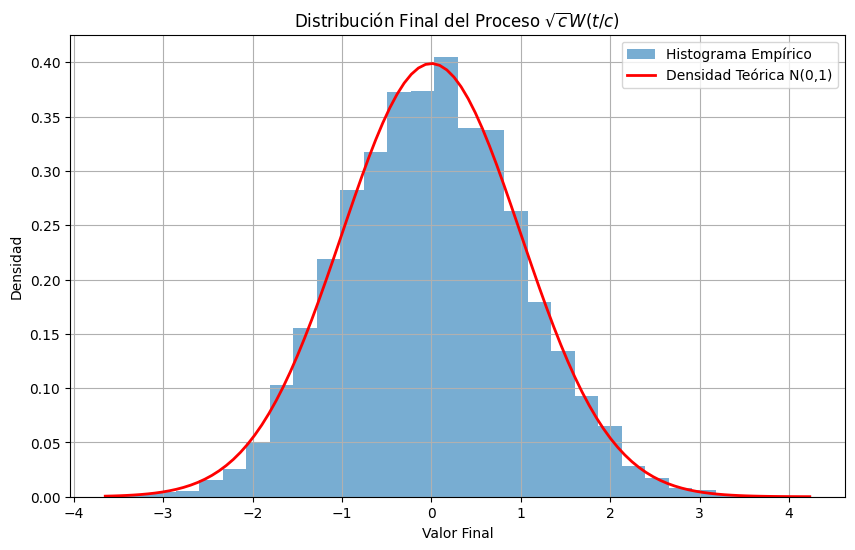

In [3]:
from stochastic_processes import plot_final_distribution

# a) rho W(t) + sqrt(1 - rho^2) W'(t)
rho = 0.8

W_prime = simulate_wiener_process(T, W0, M, N)
W_a = rho * W + np.sqrt(1 - rho**2) * W_prime

plot_time_simulations(W_a, t_values, r"$\rho W(t) + \sqrt{1 - \rho^2} W'(t)$")
plot_final_distribution(W_a, r"$\rho W(t) + \sqrt{1 - \rho^2} W'(t)$")

# b) -W(t)

W_b = -W

plot_time_simulations(W_b, t_values, r"$-W(t)$")
plot_final_distribution(W_b, r"$-W(t)$")

# c) sqrt(c) W(t/c)
c = 2


W_c = np.sqrt(c) * simulate_wiener_process(T/c, W0, M, N)
tiempo_escalado = t_values / c

plot_time_simulations(W_c, tiempo_escalado, r"$\sqrt{c} W(t/c)$")
plot_final_distribution(W_c, r"$\sqrt{c} W(t/c)$")

## Ejercicio 4

Make an animation in Python illustrating the evolution of the distribution of a Brownian motion process starting from $x_0$:

$P(B(t) = x | B(t_0) = x_0)$.

To this end, simulate $M$ trajectories of the process in the interval $[t_0, t_0 + T]$ and plot the time evolution of the histogram using as frames a grid of regularly spaced times in that interval. Plot the theoretical form of the density function on the same graph, so that it can be compared with the histogram.


/home/ivan/.pyenv/versions/3.10.15/envs/data-science/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


NameError: name 'animation' is not defined

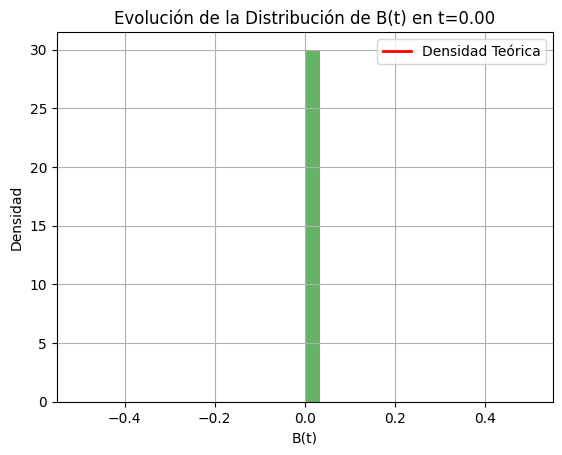

In [4]:
from stochastic_processes import animate_simulation_distribution

# Ejemplo de uso:
ani = animate_simulation_distribution(W, x0=0, t0=0, T=T, num_frames=100)
HTML(ani.to_jshtml())
